<a href="https://colab.research.google.com/github/sathvikdurgapu/Finding-Shortest-Path-Using-Q-Learning-Algorithm/blob/main/Finding%20the%20Shortest%20Path%20using%20Q%20Learning%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Shortest Path Using Q-Learning Algorithm

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
%matplotlib inline

## Visualize the Graph

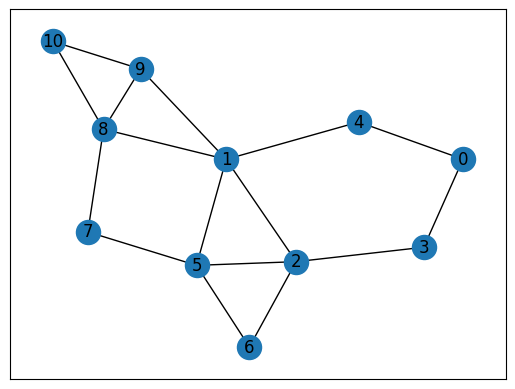

In [ ]:
edges = [(0,4),(4,0),(0,3),(3,0),(1,2),(2,1),(1,4),(4,1),(1,8),(8,1),(1,9),(9,1),(2,3),(3,2),(2,6),(6,2),(1,5),(5,1),(2,5),(5,2),(5,6),(6,5),(7,8),(8,7),(7,5),(5,7),(8,9),(9,8),(8,10),(10,8),(9,10),(10,9)]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

## Intializing Reward and Q Matrix

In [ ]:
R = np.matrix(np.zeros(shape=(11,11)))
for x in G[10]:
  R[x,10]=100

In [ ]:
Q = np.matrix(np.zeros(shape=(11,11)))
Q-=100
for node in G.nodes:
  for x in G[node]:
    Q[node,x]=0
    Q[x,node]=0

In [ ]:
import pandas as pd
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [ ]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,0.0,0.0,-100.0
2,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0
3,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0
9,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0


In [ ]:
def next_number(start,er):
  random_value = random.uniform(0,1) # chooses a random number between 0 and 1
  if(random_value<er): # if the random number is below the threshold, it chooses next action randomly
    sample=G[start]
  else: 
    sample = np.where(Q[start,] == np.max(Q[start,]))[1]
  next_node = int(np.random.choice(sample,1))
  return next_node

In [ ]:
def updateQ(node1,node2,lr,discount):
  max_index = np.where(Q[node2,] == np.max(Q[node2,]))[1] # finds the index of highest Q-value
  if max_index.shape[0]>1:
    max_index = int(np.random.choice(max_index,size=1))
  else:
    max_index = int(max_index)
  max_value = Q[node2,max_index]
  Q[node1,node2] = int((1-lr)*Q[node1,node2]+lr*(R[node1,node2]+discount*max_value)) # updates the Q-value

In [ ]:
def learn(er,lr,discount):
  for i in range(50000):
    start = np.random.randint(0,11)
    next_node = next_number(start,er)
    updateQ(start,next_node,lr,discount)

learn(0.5,0.8,0.8) # Set the Exploration rate, learning rate and discount factor of the learning

In [ ]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,110.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,138.0,-100.0,138.0,138.0,-100.0,-100.0,218.0,218.0,-100.0
2,-100.0,174.0,-100.0,110.0,-100.0,138.0,110.0,-100.0,-100.0,-100.0,-100.0
3,110.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,110.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,174.0,138.0,-100.0,-100.0,-100.0,110.0,174.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,138.0,-100.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,138.0,-100.0,-100.0,218.0,-100.0,-100.0
8,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,174.0,-100.0,218.0,274.0
9,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,218.0,-100.0,274.0


In [ ]:
def shortest_path(begin,end):
  path=[begin]
  next_node = np.argmax(Q[begin,])
  path.append(next_node)
  while next_node != end:
    next_node = np.argmax(Q[next_node,])
    path.append(next_node)
  return path

In [ ]:
shortest_path(0,10)

[0, 4, 1, 8, 10]